In [24]:
import pandas as pd
df = pd.read_csv("leader_dataset.csv")
df.head()






,Bot,Environment,Health_Checkup,Damage,Rank,Leader_selected
0,Earthbot,Earth,71,no,3,Leader
1,Earthbot,Earth,91,Yes,1,Not Leader
2,Earthbot,Earth,1,no,5,Not Leader
3,Earthbot,Earth,62,no,3,Not Leader
4,Earthbot,Earth,54,no,4,Not Leader


In [25]:
inputs = df.drop('Leader_selected',axis = 'columns')
target = df['Leader_selected']

from sklearn.preprocessing import LabelEncoder
le_bot = LabelEncoder()
le_Environment = LabelEncoder()
le_Damage = LabelEncoder()

In [26]:
inputs['Bot_n'] = le_bot.fit_transform(inputs['Bot'])
inputs['Environment_n'] = le_Environment.fit_transform(inputs['Environment'])
inputs['Damage_n'] = le_Damage.fit_transform(inputs['Damage'])
inputs.head()



,Bot,Environment,Health_Checkup,Damage,Rank,Bot_n,Environment_n,Damage_n
0,Earthbot,Earth,71,no,3,0,0,1
1,Earthbot,Earth,91,Yes,1,0,0,0
2,Earthbot,Earth,1,no,5,0,0,1
3,Earthbot,Earth,62,no,3,0,0,1
4,Earthbot,Earth,54,no,4,0,0,1


In [27]:
inputs_n = inputs.drop(['Bot','Environment','Damage'],axis = 'columns')
inputs_n



,Health_Checkup,Rank,Bot_n,Environment_n,Damage_n
0,71,3,0,0,1
1,91,1,0,0,0
2,1,5,0,0,1
3,62,3,0,0,1
4,54,4,0,0,1
5,38,3,0,2,1
6,92,1,0,2,0
7,27,5,0,2,1
8,2,3,0,2,1
9,10,4,0,2,1


In [28]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_n,target)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
model.predict([[88,3,1,1,1]])





array(['Leader'], dtype=object)

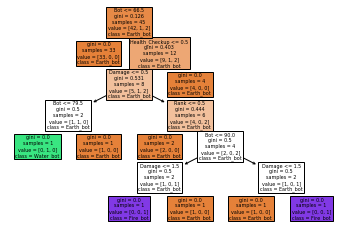

In [23]:
#tree.plot_tree(model)
fn=['Bot','Environment','Damage','Rank','Health_Checkup']
cn=['Earth_bot','Water_bot','Fire_bot']
tree.plot_tree(model,feature_names = fn,class_names =cn,filled = True);